In [42]:
%pip install dictlearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\horje\.pyenv\pyenv-win\versions\3.9.6\python.exe -m pip install --upgrade pip' command.


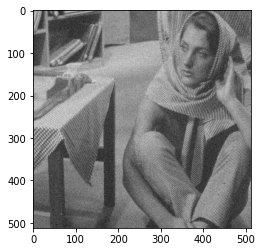

In [1]:
# Lab 6  |  6 Ianuarie 2022
# Horjea Cosmin-Marian 343
# Grupa 3a 
import numpy as np
from dictlearn import DictionaryLearning, methods
from matplotlib import image
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

p = 8
s = 6 
N = 1000
n = 256
K = 50
sigma = 0.075

def psnr(img1,img2):
	mse = np.mean((img1-img2)**2)
	if mse == 0:
		return 0
	max_pixel = 255
	psnr= 20 * np.log10(max_pixel / np.sqrt(mse))
	return psnr


I = image.imread('barbara.png')
# print(len(I),len(I[0]))


Inoisy = I + sigma*np.random.randn(I.shape[0],I.shape[1])
plt.imshow(Inoisy, cmap='gray')


In [2]:
Ynoisy = extract_patches_2d(Inoisy, (p,p))

Ynoisy = Ynoisy.reshape(Ynoisy.shape[0],-1)

mean_of_signals = np.mean(Ynoisy, axis=0)

Ynoisy -= mean_of_signals

Ynoisy = Ynoisy.T

Y = Ynoisy[:, np.random.choice(Ynoisy.shape[1], N, replace=False)]

In [3]:
D0 = np.random.randn(Ynoisy.shape[0],n)
# np.random.randn()
# dict are aacelasi nr de linii ca y noisy iar nr de colone e nr de atomi "n" adica 256
print(D0.shape)
D0 = normalize(D0,axis=1,norm='max')  # try to change this

dl = DictionaryLearning(
	n_components=n,
	max_iter=K,
	fit_algorithm='ksvd',
	n_nonzero_coefs=s,
	code_init=None,
	dict_init=D0,
	params=None,
	data_sklearn_compat=False
)


dl.fit(Y)
D = dl.D_
print(D)

(64, 256)


C:\Users\horje\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\horje\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

[[-0.1233981  -0.12568979 -0.12237578 ... -0.05401536  0.07731512
  -0.15441514]
 [-0.12446788 -0.1227642  -0.12110044 ... -0.07701146  0.00504064
  -0.12585099]
 [-0.12357814 -0.12447911 -0.12681228 ... -0.08925485 -0.20588193
   0.23915682]
 ...
 [-0.12385473 -0.12282099 -0.12623941 ... -0.09040196 -0.06242308
   0.07070355]
 [-0.12174972 -0.12366889 -0.1243198  ... -0.14104875 -0.084932
   0.01801987]
 [-0.12483166 -0.12464011 -0.12223767 ... -0.05250787  0.0732447
   0.02565909]]


In [4]:
print(Ynoisy.shape)
print(D.shape)
Xc, err = methods.omp(Ynoisy, D ,n_nonzero_coefs = s) # this should be Y probably

(64, 255025)
(64, 256)


C:\Users\horje\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [5]:
print(len(Xc),len(Xc[0]))
print(len(D),len(D[0]))
Yc = D@Xc
print(Yc.shape)
Yc =  Yc.T+ mean_of_signals
print(Yc.shape)
Yc = Yc.reshape(-1,p,p)

256 255025
64 256
(64, 255025)
(255025, 64)


Cleaned:  60.179319603093035
Noisy:  70.63290005123037


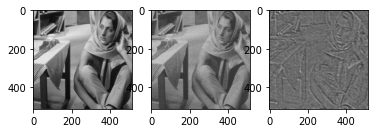

In [6]:
Ic = reconstruct_from_patches_2d(Yc, I.shape)
plt.subplot(1,3,1)
plt.imshow(I, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(Inoisy, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(Ic,cmap='gray')
print('Cleaned: ',psnr(I,Ic))
print('Noisy: ',psnr(I,Inoisy))
